# MFCCの抽出と可視化 by librosa

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

In [2]:
IN_WAVE_FILE = "in.wav"  # モノラル音声（前提）

FRAME_LENGTH = 1024  # フレーム長
HOP_LENGTH = 80  # フレームのシフト長
N_MELS = 128  # メルフィルタバンクの数
N_MFCC = 20  # MFCCの次数

In [3]:
# 音声データ読み込み (fsがサンプリング周波数、dataは音声データ)
fs, data = wavfile.read(IN_WAVE_FILE)
data = data.astype(np.float64)

## 音声波形からMFCC抽出

In [4]:
# MFCCの抽出 (音声から抽出)
mfcc = librosa.feature.mfcc(y=data, sr=fs, n_mels=N_MELS, hop_length=HOP_LENGTH)

In [5]:
# 形状の確認
print("MFCC arrayの形状: ", mfcc.shape)

MFCC arrayの形状:  (20, 241)


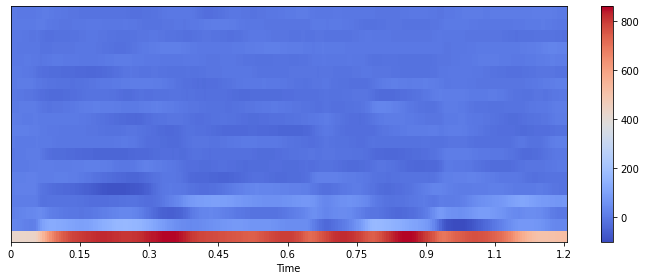

In [6]:
# MFCCの表示
fig = plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis="time", hop_length=HOP_LENGTH, sr=fs)
plt.colorbar()
plt.tight_layout()
plt.show()

## メルスペクトログラムからMFCC抽出

In [8]:
# メルスペクトログラムの抽出
mel_spec = librosa.feature.melspectrogram(
    y=data, sr=fs, n_mels=N_MELS, hop_length=HOP_LENGTH
)

# デシベルスケールにする
mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)

In [9]:
# MFCCの抽出
mfcc = librosa.feature.mfcc(S=mel_spec_dB, sr=fs, n_mels=N_MELS, hop_length=HOP_LENGTH)

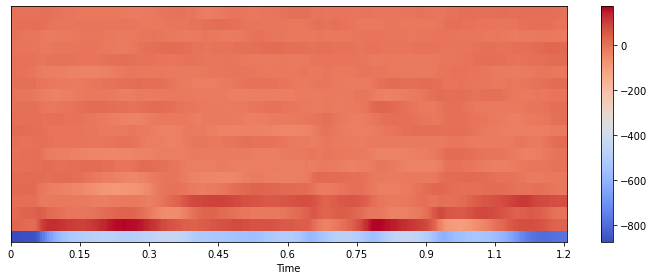

In [10]:
# メルスペクトログラムの表示
fig = plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis="time", hop_length=HOP_LENGTH, sr=fs)
plt.colorbar()
plt.tight_layout()
plt.show()